<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    float64
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    float64
 7   Mg          487 non-null    float64
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
dtypes: float64(15)
memory usage: 57.2 KB


In [9]:
df.dropna(inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
dtypes: float64(15)
memory usage: 60.6 KB


In [12]:
df.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.808880,7.436784,115.889278,62.251546,196.757361,8.911093,43.756701,24.387629,3.042495,0.512101,14.180745,1.291492,14.829563,0.089608,0.293930
std,0.411552,1.106868,47.332843,20.104135,81.181745,5.730719,17.846411,10.829170,2.306840,0.495054,9.297846,1.840738,14.662305,0.156697,0.132472
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.550000,6.700000,84.000000,50.000000,140.000000,5.290000,32.000000,16.000000,1.770000,0.249000,8.600000,0.246000,5.544000,0.023700,0.222014
50%,7.860000,7.400000,102.000000,56.000000,171.100000,7.100000,40.000000,22.000000,2.420000,0.312000,11.000000,0.535982,9.570000,0.046253,0.254719
75%,8.100000,8.100000,129.000000,72.000000,220.000000,10.240000,52.000000,28.000000,3.400000,0.466000,16.400000,1.526654,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


Regression

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd


In [23]:
X = df.drop('WPI',axis=1)
y = df['WPI']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=0.2)

In [24]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [25]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

In [28]:
y_pred=reg.predict(X_testscaled)
r2_score(y_pred, y_test)

0.7664325571237559

Categorical/Classification

In [31]:
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [32]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

In [33]:
df

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [35]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [36]:
df.dropna(inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
 15  WQC         485 non-null    object 
dtypes: float64(15), object(1)
memory usage: 64.4+ KB


In [38]:
data=df

In [39]:
data.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.808880,7.436784,115.889278,62.251546,196.757361,8.911093,43.756701,24.387629,3.042495,0.512101,14.180745,1.291492,14.829563,0.089608,0.293930
std,0.411552,1.106868,47.332843,20.104135,81.181745,5.730719,17.846411,10.829170,2.306840,0.495054,9.297846,1.840738,14.662305,0.156697,0.132472
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.550000,6.700000,84.000000,50.000000,140.000000,5.290000,32.000000,16.000000,1.770000,0.249000,8.600000,0.246000,5.544000,0.023700,0.222014
50%,7.860000,7.400000,102.000000,56.000000,171.100000,7.100000,40.000000,22.000000,2.420000,0.312000,11.000000,0.535982,9.570000,0.046253,0.254719
75%,8.100000,8.100000,129.000000,72.000000,220.000000,10.240000,52.000000,28.000000,3.400000,0.466000,16.400000,1.526654,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [40]:
X1 = data.drop('WQC',axis=1)
y1 = data['WQC']

In [41]:
X1

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [42]:
y1

0      Excellent
1      Excellent
2      Excellent
3      Excellent
4      Excellent
         ...    
482    Excellent
483    Excellent
484    Excellent
485         Good
486    Excellent
Name: WQC, Length: 485, dtype: object

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,random_state=1, test_size=0.2)
sc_X1 = StandardScaler()
X1_trainscaled=sc_X1.fit_transform(X1_train)
X1_testscaled=sc_X1.transform(X1_test)

In [44]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1).fit(X1_trainscaled, y1_train)
y1_pred=clf.predict(X1_testscaled)
print(clf.score(X1_testscaled, y1_test))

0.979381443298969


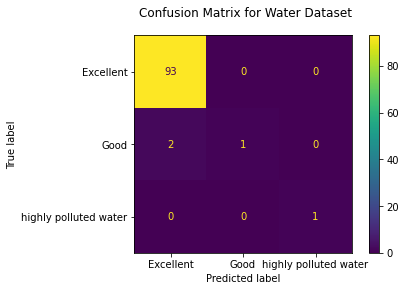

In [45]:
fig=plot_confusion_matrix(clf, X1_testscaled, y1_test)
fig.figure_.suptitle("Confusion Matrix for Water Dataset")
plt.show()

In [46]:
X1.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [47]:
y1.head()

0    Excellent
1    Excellent
2    Excellent
3    Excellent
4    Excellent
Name: WQC, dtype: object

In [52]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y1 = labelencoder.fit_transform(y1)

In [58]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0,
       3, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
# Now for train and test split (80% of  dataset into  training set and  other 20% into test data)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)

In [60]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)  
X1_test = scaler.transform(X1_test)

In [62]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X1_train, y1_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [63]:
predictions = mlp.predict(X1_test)

In [64]:
print(predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [66]:
import warnings
warnings.filterwarnings('ignore')
# Last thing: evaluation of algorithm performance in classifying flowers
print(confusion_matrix(y1_test,predictions))  
print(classification_report(y1_test,predictions))

[[92  0  0  0]
 [ 2  2  0  0]
 [ 0  0  0  0]
 [ 0  0  1  0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        92
           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1

    accuracy                           0.97        97
   macro avg       0.49      0.38      0.41        97
weighted avg       0.97      0.97      0.97        97

